In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv("../.env")
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
MODEL_TRAINING_DATASET_PATH=os.getenv("MODEL_TRAINING_DATASET_PATH")
GENERATED_DATASETS_PATH=os.getenv("GENERATED_DATASETS_PATH")


sys.path.append("../")
from cpsl_datasets.gnn_node_ds import GnnNodeDS

from mmwave_model_integrator.input_encoders._node_encoder import _NodeEncoder
from mmwave_model_integrator.ground_truth_encoders._gt_node_encoder import _GTNodeEncoder
from mmwave_model_integrator.plotting.plotter_gnn_pc_processing import PlotterGnnPCProcessing


/home/david/.cache/pypoetry/virtualenvs/odometry-JJ4jnFPp-py3.10/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#initialize the dataset
dataset_path = os.path.join(DATASET_PATH,"gnn_train")
dataset = GnnNodeDS(
    dataset_path=dataset_path,
    node_folder="nodes",
    label_folder="labels"
)
print(dataset_path)

found 393 node samples
found 393 label samples
/data/radnav/radnav_model_datasets/gnn_train


In [3]:
#initialize the encoder and decoder
input_encoder = _NodeEncoder()
ground_truth_encoder = _GTNodeEncoder()
plotter = PlotterGnnPCProcessing()

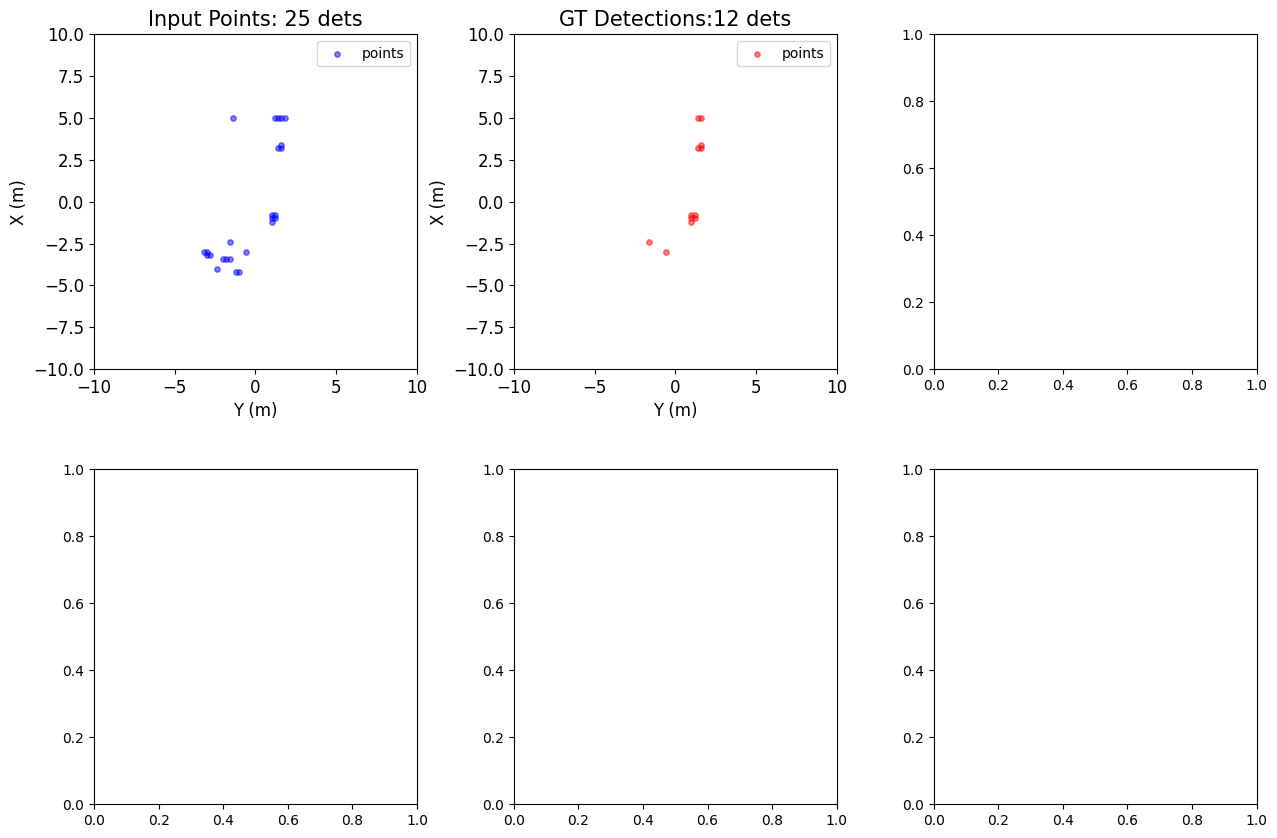

In [4]:
#plot a sample from the training dataset
nodes = dataset.get_node_data(idx=1)
labels = dataset.get_label_data(idx=1)

plotter.plot_compilation(
    input_data=nodes,
    gt_data=labels,
    input_encoder=input_encoder,
    ground_truth_encoder=ground_truth_encoder,
    show=True
)

In [ ]:
from mmwave_model_integrator.config import Config
import mmwave_model_integrator.torch_training.trainers as trainers

config_path = "../configs/sage_gnn_base.py"
config = Config(config_path)

config.print_config()

trainer_config = config.trainer
trainer_class = getattr(trainers,trainer_config.pop('type'))
trainer = trainer_class(**trainer_config)

model=dict(
    type=SageGNNClassifier,
    in_channels=4,
    hidden_channels=16,
    out_channels=1,
),
generated_dataset=dict(
    input_encoding_folder=nodes,
    ground_truth_encoding_folder=labels,
    generated_dataset_path=/data/radnav/radnav_model_datasets/gnn_train,
),
trainer=dict(
    type=GNNTorchTrainer,
    model=dict(
        type=SageGNNClassifier,
        in_channels=4,
        hidden_channels=16,
        out_channels=1,
    ),
    optimizer=dict(
        type=Adam,
        lr=0.001,
    ),
    loss_fn=dict(
        type=BCELoss,
    ),
    dataset=dict(
        type=_GnnNodeDataset,
        edge_radius=10.0,
        transforms=[],
        enable_random_yaw_rotate=True,
        enable_occupancy_grid_preturbations=True,
        enable_x_y_position_preturbations=True,
    ),
    data_loader=dict(
        type=TGDataLoader,
        batch_size=64,
        shuffle=True,
        num_workers=4,
    ),
    dataset_path=/data/radnav/radnav_model_datasets/gnn_train,
    node_di

ModelTrainer.train: training the network...


  5%|▌         | 1/20 [00:05<01:48,  5.72s/it]

EPOCH: 1/20
	 Train loss: 0.880630373954773, Val loss:1.3943628072738647


 10%|█         | 2/20 [00:11<01:40,  5.58s/it]

EPOCH: 2/20
	 Train loss: 0.8706160187721252, Val loss:1.38869047164917


 15%|█▌        | 3/20 [00:16<01:34,  5.54s/it]

EPOCH: 3/20
	 Train loss: 0.8620591759681702, Val loss:1.3748019933700562


 20%|██        | 4/20 [00:22<01:27,  5.46s/it]

EPOCH: 4/20
	 Train loss: 0.8624570369720459, Val loss:1.369004487991333


 25%|██▌       | 5/20 [00:27<01:21,  5.43s/it]

EPOCH: 5/20
	 Train loss: 0.8582249283790588, Val loss:1.3665642738342285


 30%|███       | 6/20 [00:32<01:16,  5.47s/it]

EPOCH: 6/20
	 Train loss: 0.851252555847168, Val loss:1.349419355392456


 35%|███▌      | 7/20 [00:38<01:11,  5.51s/it]

EPOCH: 7/20
	 Train loss: 0.8482152223587036, Val loss:1.3397064208984375


 40%|████      | 8/20 [00:43<01:05,  5.48s/it]

EPOCH: 8/20
	 Train loss: 0.8452776074409485, Val loss:1.3403799533843994


 45%|████▌     | 9/20 [00:49<01:00,  5.50s/it]

EPOCH: 9/20
	 Train loss: 0.8421552181243896, Val loss:1.3363988399505615


 50%|█████     | 10/20 [00:55<00:54,  5.50s/it]

EPOCH: 10/20
	 Train loss: 0.8390514850616455, Val loss:1.3278906345367432


 55%|█████▌    | 11/20 [01:00<00:49,  5.50s/it]

EPOCH: 11/20
	 Train loss: 0.8368760347366333, Val loss:1.328773021697998


 60%|██████    | 12/20 [01:06<00:44,  5.52s/it]

EPOCH: 12/20
	 Train loss: 0.8291398286819458, Val loss:1.3116670846939087


 65%|██████▌   | 13/20 [01:11<00:38,  5.47s/it]

EPOCH: 13/20
	 Train loss: 0.8283244371414185, Val loss:1.310844898223877


 70%|███████   | 14/20 [01:16<00:32,  5.45s/it]

EPOCH: 14/20
	 Train loss: 0.8286810517311096, Val loss:1.306664228439331


 75%|███████▌  | 15/20 [01:22<00:27,  5.44s/it]

EPOCH: 15/20
	 Train loss: 0.8209452629089355, Val loss:1.30640709400177


 80%|████████  | 16/20 [01:27<00:21,  5.42s/it]

EPOCH: 16/20
	 Train loss: 0.8223427534103394, Val loss:1.286529779434204


 85%|████████▌ | 17/20 [01:33<00:16,  5.45s/it]

EPOCH: 17/20
	 Train loss: 0.81766676902771, Val loss:1.287268877029419


 90%|█████████ | 18/20 [01:38<00:10,  5.43s/it]

EPOCH: 18/20
	 Train loss: 0.8106117248535156, Val loss:1.2878403663635254


 95%|█████████▌| 19/20 [01:43<00:05,  5.41s/it]

EPOCH: 19/20
	 Train loss: 0.8077431917190552, Val loss:1.2778520584106445


100%|██████████| 20/20 [01:49<00:00,  5.48s/it]

EPOCH: 20/20
	 Train loss: 0.8108177185058594, Val loss:1.282538652420044
ModelTrainer.train: total training time 109.55


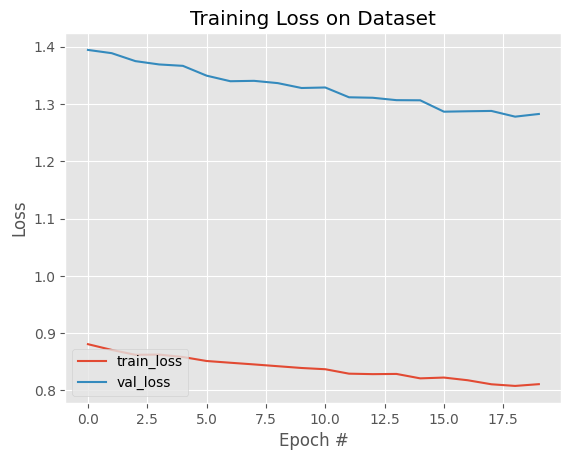

In [6]:
trainer.train_model()